#Demo: Interpolator

*This script provides a few examples on using the Interpolator class.
Last updated: April 14, 2015.
Copyright (C) 2014 Randall Romero-Aguilar
Licensed under the MIT license, see LICENSE.txt*

*Interpolator* is a subclass of *Basis*.  
* A *Basis* object contains data to compute the interpolation matrix $\Phi(x)$ at arbitrary values of $x$ (within the interpolation box).
* An *Interpolator* is used to interpolate a given function $f(x)$, when the value of $f$ is known at the basis nodes. It adds methods to the *Basis* class to compute interpolation coefficients $c$ and to interpolate $f$ at arbitrary $x$.

Evaluation of this objects is straighforward:
* If B is a Basis, then  B(x, k) computes the interpolating matrix $D^{(k)}\Phi(x)$, the k-derivative of $\Phi$
* If V is an Interpolator, then  V(x, k) interpolates $D^{(k)}f(x)$, the k-derivative of $f$.


In [1]:
%matplotlib notebook
import numpy as np
from compecon import Basis, Interpolator
import matplotlib.pyplot as plt
import seaborn as sns
import time

np.set_printoptions(precision=3, suppress=True)
#sns.set(style='whitegrid')

##EXAMPLE 1:
Using BasisChebyshev to interpolate a 1-D function with a Chebyshev basis

**PROBLEM:** Interpolate the function $y = f(x) = 1 + sin(2x)^2$ on the domain $[0,\pi]$, using 5 Gaussian nodes.

There are two ways to create an *Interpolator* object.

 * Defining the basis first, then the interpolator with known function values at nodes

In [3]:
f = lambda x: (1 + np.sin(2*x)**2)
B = Basis(5,0,np.pi)
V = Interpolator(B, y=f(B.nodes))

We are goint to make the same plot several times, so define it with a function

In [3]:
xx = np.linspace(0,np.pi,120)
def plot(P):
    plt.figure()
    plt.plot(xx,f(xx))
    plt.plot(xx,P(xx))
    plt.scatter(P.nodes,P(),color='red') #add nodes

Plot the interpolation at a refined grid. Notice how the interpolation is exact at the nodes.

<IPython.core.display.Javascript object>


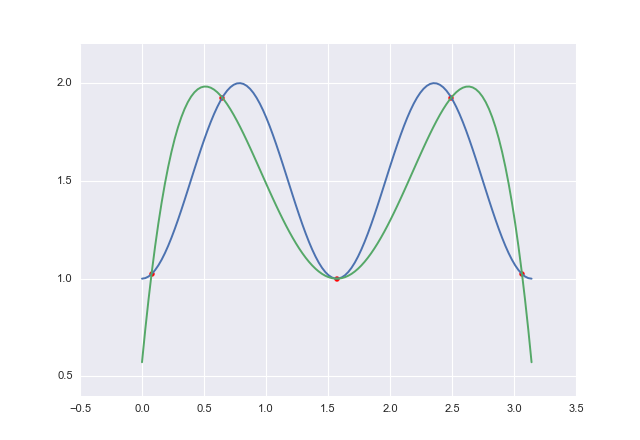

In [4]:
plot(V)

 * The second option is to create the *Interpolator* just as a regular *Basis*, adding the known function values at the next step. The difference is that we end up with only one object.

<IPython.core.display.Javascript object>


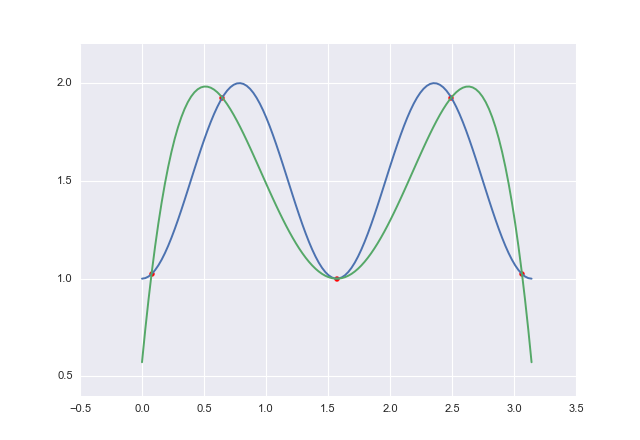

In [5]:
S = Interpolator(5,0,np.pi)
S.y = f(S.nodes)
plot(S)

* When we have a callable object (like the lambda f) we can pass it directly to the constructor, which will evaluate it at the nodes:

<IPython.core.display.Javascript object>


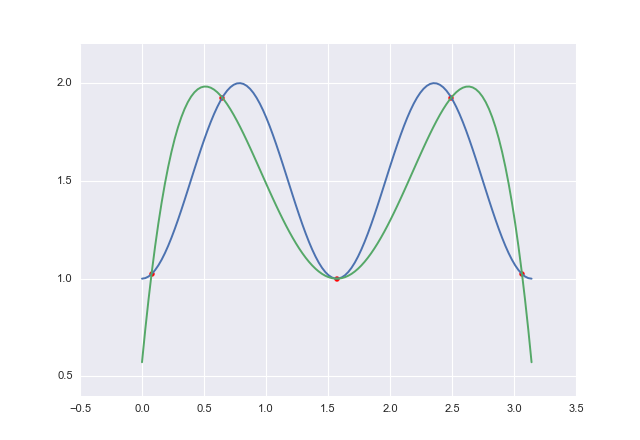

In [6]:
U = Interpolator(5,0,np.pi, y = f)
plot(U)

### Let's time it

Interpolate the first derivative of $S$ at the $xx$ values, repeat $10^4$ times.

In [7]:
t0 = time.time()
for k in range(10000):
    S(xx, 1)
    
time.time() - t0

3.130178928375244

In MATLAB, it takes around 6 seconds!!